In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('crime_data.csv')

In [ ]:
df.drop(columns={'DR_NO', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'}, inplace=True)

In [ ]:
names = {
    'DATE OCC': 'Date',
    'Date Rptd': 'Date Reported',
    'TIME OCC': 'Time',
    'AREA NAME': 'Area Name',
    'Rpt Dist No': 'Reporting District Number',
    'Part 1-2': 'Type 1-2',
    'Crm Cd': 'Crime Code',
    'Crm Cd Desc': 'Crime',
    'Vict Age': 'Victim Age',
    'AREA': 'Area ID',
    'Mocodes': 'MO Codes',
    'Vict Sex': 'Victim Sex',
    'Vict Descent': 'Victim Descent',
    'Premis Cd': 'Premises Code',
    'Premis Desc': 'Premises',
    'Weapon Used Cd': 'Weapon Used Code',
    'Weapon Desc': 'Weapon',
    'Status Desc': 'Status Description',
    'LOCATION': 'Location',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}

In [ ]:
df.rename(columns=names, inplace=True)

In [ ]:
df['Status Description'].replace({'Continued Investigation.':'Continued Investigation', 'Juv Arrest': 'Juvenile Arrest', 'UNK': 'Unknown', 'Juv Other': 'Juvenile Other'}, inplace=True)

In [ ]:
df['Status'].replace('IC', 'CI', inplace=True)

In [ ]:
df['Status'].replace('CC', 'UK', inplace=True)

In [ ]:
df.head()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

In [ ]:
df['Victim Descent'].replace({'Hispanic': 'H', 'Black': 'B', 'White': 'W', 'Asian': 'A', 'Other': 'O', 'None': 'X'}, inplace=True)

In [ ]:
df.head()

In [ ]:
df_encoded_gender = pd.get_dummies(df, columns=['Victim Sex'])

In [ ]:
df_encoded_race = pd.get_dummies(df, columns=['Victim Descent'])

In [ ]:
df_encoded_gender.info()


In [ ]:
df['Victim Sex'].unique()

In [ ]:
print(df[df['Victim Sex'] == 'H'])

In [ ]:
df['Victim Descent'].unique()

In [ ]:
df_encoded_race.info()

In [ ]:
df_encoded_race.head()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df_encoded_gender.info()

In [ ]:
isolate = [21,23,22,24,25]
encoded_gender = df_encoded_gender.iloc[:,isolate]

In [ ]:
encoded_gender.info()

In [ ]:
df = pd.concat([df, encoded_gender], axis=1)

In [ ]:
isolate = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
df = df.iloc[:,isolate]

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
original = pd.read_csv('crime_data.csv')

In [ ]:
df['MO Codes'] = original['Mocodes']

In [ ]:
df.info()

In [ ]:
df.drop(columns=['Date Reported'], inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
copy = df.copy()

In [ ]:
copy.head()

In [ ]:
copy = df.copy()

In [ ]:
copy.head()

In [ ]:
copy['Time'] = pd.to_datetime(copy['Time'], format='%H%M', errors='coerce').dt.time

In [ ]:
copy.head()

In [ ]:
copy = df.copy()


In [ ]:
copy.head()

In [ ]:
copy['Time'] = pd.to_datetime(copy['Time'], format='%H%M', errors='coerce')

In [ ]:
copy.info()

In [ ]:
copy.head()

In [ ]:
copy['Time'] = copy['Time'].dt.time

In [ ]:
copy.head()

In [ ]:
copy.info()

In [ ]:
copy['Crime'].unique()

In [ ]:
search = 'CHILD PORNOGRAPHY'
result = copy[copy['Crime'] == search]
print(result)

In [ ]:
copy.head()

In [ ]:
print(df)

In [ ]:
df.head()

In [ ]:
copy = df.copy()

In [ ]:
copy.head()

In [ ]:
copy['Date'] = pd.to_datetime(copy['Date'])

In [ ]:
copy.info()

In [ ]:
copy.head()

In [ ]:
import matplotlib.pyplot as plt

crime_child_pornography = copy[copy['Crime'] == 'CHILD PORNOGRAPHY']

plt.figure(figsize=(10, 6))
plt.hist(crime_child_pornography['Victim Age'], bins=20, edgecolor='black', color='blue', alpha=0.5)

plt.title('Age Distribution for Child Pornography Crime')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.xticks(range(0, max(crime_child_pornography['Victim Age']) + 1, 5))

plt.show()


In [ ]:
crime_child_pornography = copy[copy['Crime'] == 'CHILD PORNOGRAPHY']

plt.figure(figsize=(10, 6))
plt.hist(crime_child_pornography['Victim Sex'], bins=5, edgecolor='black', color='blue', alpha=0.5)

plt.title('Age Distribution for Child Pornography Crime')
plt.xlabel('Victim Sex')
plt.ylabel('Frequency')

plt.show()

In [ ]:
def crime(crime, stat):

    c = copy[copy['Crime'] == crime]
    plt.figure(figsize=(10, 6))
    plt.hist(c[stat], bins=20, edgecolor='black', color='blue', alpha=0.5)
    plt.title(stat + 'Distribution for' + crime + 'Crime')
    plt.xlabel('Victim Sex')
    plt.ylabel('Frequency')

    plt.show()

In [ ]:
crime('CHILD PORNOGRAPHY', 'Victim Age')

In [ ]:
crime('CHILD PORNOGRAPHY', 'Victim Sex')

In [ ]:
crime('CHILD PORNOGRAPHY', 'Victim Descent')

In [ ]:
copy['Premises'].unique()

In [ ]:
filtered = copy[copy['Crime'] == 'CHILD PORNOGRAPHY']
premises_counts = filtered['Premises'].value_counts()
top_10_premises = premises_counts.head(10)
print(top_10_premises)

In [ ]:
def top_ten(crime, stat):

    filtered = copy[copy['Crime'] == crime]
    premises_counts = filtered[stat].value_counts()
    top_10_premises = premises_counts.head(10)
    print(top_10_premises)

In [ ]:
top_ten('ROBBERY', 'Premises')

In [ ]:
def graph_top_ten(crime, stat, data_frame, max_xtick_length=15):
    filtered = data_frame[data_frame['Crime'] == crime]
    premises_counts = filtered[stat].value_counts()
    top_10_premises = premises_counts.head(10)
    
    # Limit xticks length
    xtick_labels = [label[:max_xtick_length] + '...' if len(label) > max_xtick_length else label for label in top_10_premises.index]
    
    return top_10_premises.index, top_10_premises.values, xtick_labels

In [ ]:
graph_top_ten('ROBBERY', 'Premises', copy)

In [ ]:
df.head()

In [ ]:
crime_lst = copy['Crime'].unique()

In [ ]:
print(crime_lst[0:20])

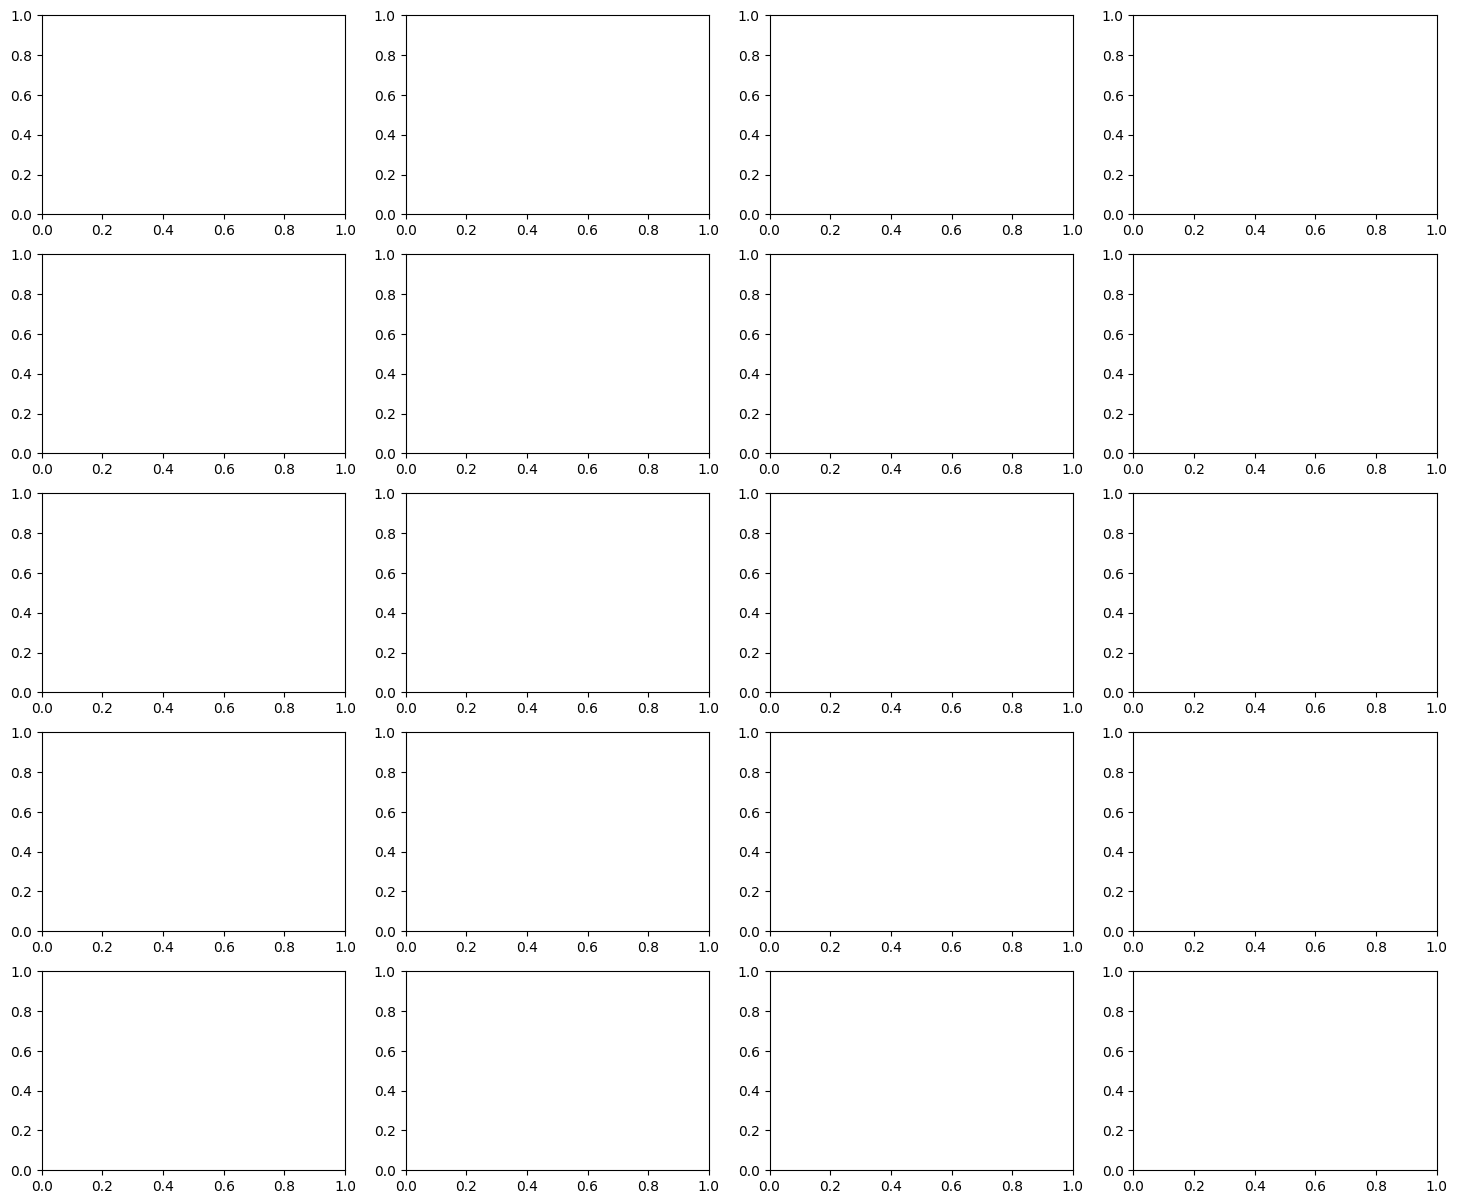

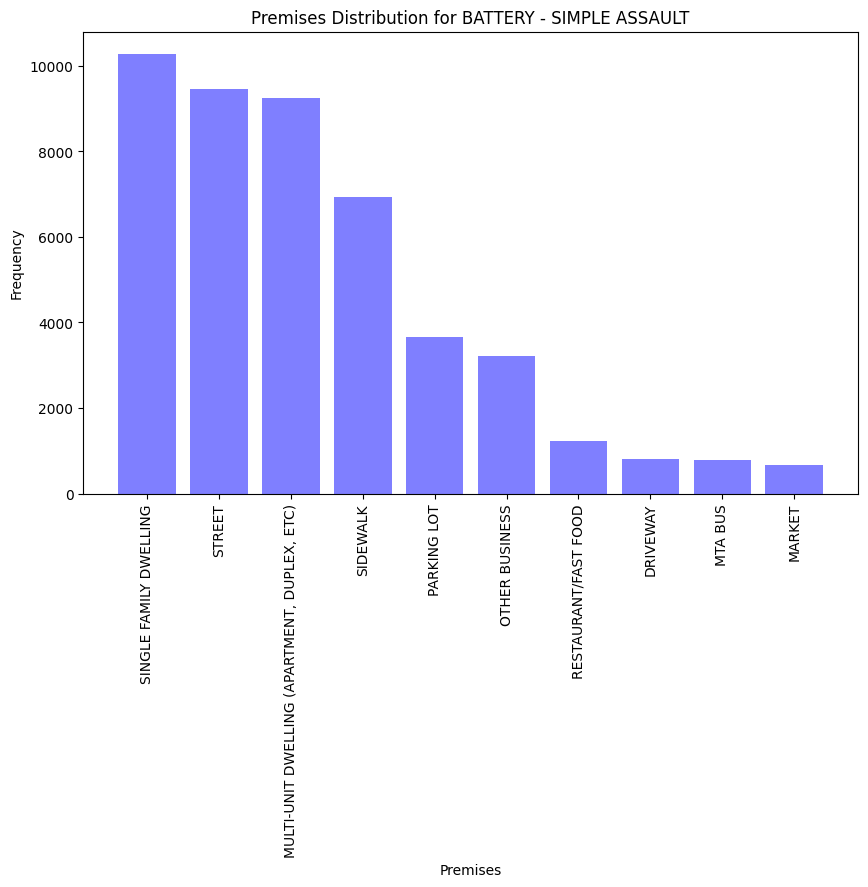

TypeError: cannot unpack non-iterable NoneType object

In [93]:
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

for idx, crime in enumerate(crime_lst[0:20]):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    x, y, xtick_labels = graph_top_ten(crime, 'Premises', copy)
    axes[row_idx, col_idx].bar(x, y, color='blue', alpha=0.5)
    axes[row_idx, col_idx].set_title('Top 10 Premises for ' + crime)
    axes[row_idx, col_idx].set_xlabel('Premises')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_xticks(x)
    axes[row_idx, col_idx].set_xticklabels(xtick_labels, rotation=45)

# Remove empty subplots if the number of crimes is less than num_rows*num_cols
for idx in range(len(crime_lst[0:20]), num_rows*num_cols):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()